# Fraud detection with Python, using ML with Logistic Regression

This example was extracted from DataCamp as an exercise to fraud dettection with Python.

The Database consists of 5050 transaction with 30 variables, with the column `Class` classifying the transaction as fraud (1) or non-fraud(0). The objective is to create a model that can predict future transactions for intervention.

The steps taken in the process where the following:
- Loading libraries and database stored in a CSV file
- Count the number of fraud vs. non-fraud ocurrences and create visualizations for better understanding of class imbalance in the data (small amount of fraud cases in contrast to the size of the database). 
- Using SMOTE synthetic fraud ocurrences to improve the number of train data for the model (could lead to confusion by the ML model) 
- Compare traditional rule-based fraud detection with Logistic Regression model

#### **Importing libraries and database**

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import Pipeline

In [2]:
# Loading the database in a variable
df = pd.read_csv("creditcard_sampledata_3.csv")
df = df.drop('Unnamed: 0', axis=1)
# Explore the features available in your dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5050 non-null   float64
 1   V2      5050 non-null   float64
 2   V3      5050 non-null   float64
 3   V4      5050 non-null   float64
 4   V5      5050 non-null   float64
 5   V6      5050 non-null   float64
 6   V7      5050 non-null   float64
 7   V8      5050 non-null   float64
 8   V9      5050 non-null   float64
 9   V10     5050 non-null   float64
 10  V11     5050 non-null   float64
 11  V12     5050 non-null   float64
 12  V13     5050 non-null   float64
 13  V14     5050 non-null   float64
 14  V15     5050 non-null   float64
 15  V16     5050 non-null   float64
 16  V17     5050 non-null   float64
 17  V18     5050 non-null   float64
 18  V19     5050 non-null   float64
 19  V20     5050 non-null   float64
 20  V21     5050 non-null   float64
 21  V22     5050 non-null   float64
 22  

#### **Counting and visualizing the number of fraud cases**

In [3]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(f'Count of ocurrences flagged as fradulents:\nNon-fraud ocurrences: {occ[0]} \nFraud ocurrences: {occ[1]}\n')

# Print the ratio of fraud ocurrences
print(f'Ratio of ocurrences: \nNon-fraud ocurrences: {round(occ[0]/len(df)*100, 4)}%\nFraud ocurrences: {round(occ[1]/len(df)*100, 4)}%')

Count of ocurrences flagged as fradulents:
Non-fraud ocurrences: 5000 
Fraud ocurrences: 50

Ratio of ocurrences: 
Non-fraud ocurrences: 99.0099%
Fraud ocurrences: 0.9901%


In [4]:
# Extracting features from the df
X = df.iloc[:, 1:-1]
X = np.array(X).astype(float)
y = df.iloc[:, -1]
y = np.array(y).astype(float)

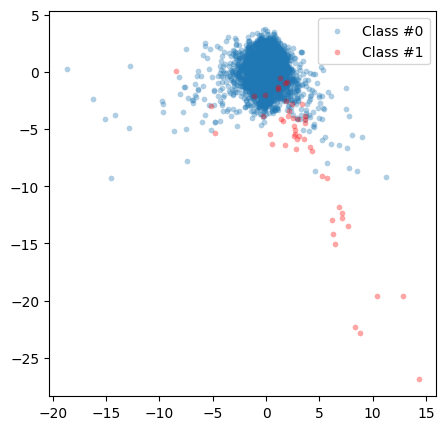

In [5]:
# Plotting data to visualize fraud to non-fraud ratio
def plot_data (X,y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.35, linewidth=0.15, s=15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.35, linewidth=0.15, c='r', s=15)
    plt.legend()
    plt.show()
    return

plot_data (X,y)

Since the ratio of fraudulent to non-fraudulent transactions is very low, it creates a **Class Imbalance** problem. This could lead the ML model to bias towards the majority class, underperforming in comparison with the fraud ocurrences.

To overcome that situation, there are some techniques that could be used like **Random Under Sampling(RUS)**, **Random Over Sampling (ROS)** and **Synthetic Minority Oversampling Technique (SMOTE)**, each one with it pros and cons. For this case will be used the SMOTE to deal with class imbalance.

#### **Using SMOTE to create synthetic fraud ocurrences and compare visually with the original data**

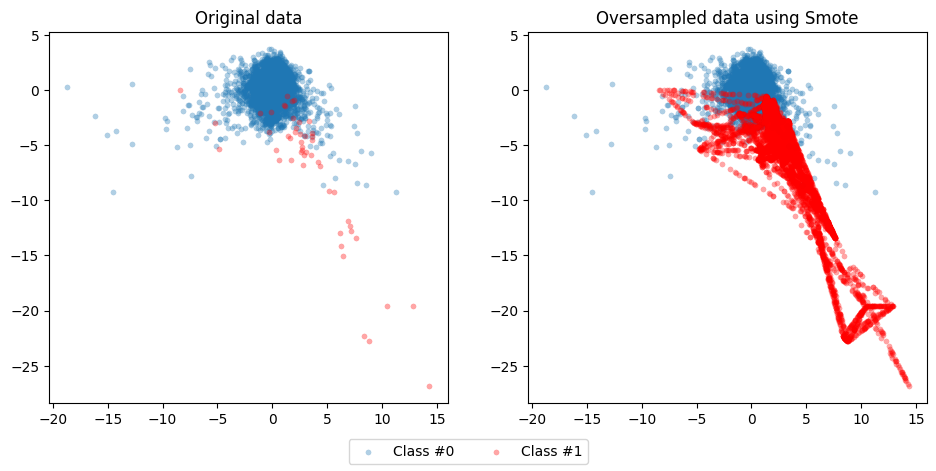

0.0    5000
1.0      50
Name: count, dtype: int64
0.0    5000
1.0    5000
Name: count, dtype: int64


In [6]:
# define the ressampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X,y)

# Run compare_plot
def compare_data (X,y,ax):
    ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.35, linewidth=0.15, s=15)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.35, linewidth=0.15, c='r', s=15)
    return

fig, axs = plt.subplots(1, 2, figsize = (10,5))
compare_data(X,y, axs[0])
axs[0].set_title('Original data')
compare_data(X_resampled,y_resampled, axs[1])
axs[1].set_title('Oversampled data using Smote')
plt.figlegend(('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

# Print the value_counts on the original and ressampled labels y
print(pd.Series(y).value_counts())
print(pd.Series(y_resampled).value_counts())

As could be seen above, the SMOTE technique created enough synthetic ocurrences to balance the data completely, with will help the ML model to identify fraud in transactions but could lead to confusion, since not all sythetic data would have been classified as fraud in a real world scenario.

#### **Using rule-based threshold to catch fraud**

In [7]:
# Defining thresholds values using common statistics
df.groupby('Class').mean() # get the mean values of each group

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.035030,0.011553,0.037444,-0.045760,-0.013825,-0.030885,0.014315,-0.022432,-0.002227,0.001667,...,-0.002896,-0.010583,-0.010206,-0.003305,-0.000918,-0.002613,-0.004651,-0.009584,0.002414,85.843714
1,-4.985211,3.321539,-7.293909,4.827952,-3.326587,-1.591882,-5.776541,1.395058,-2.537728,-5.917934,...,0.194580,0.703182,0.069065,-0.088374,-0.029425,-0.073336,-0.023377,0.380072,0.009304,113.469000


In [8]:
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5),1,0) # filtering V1 and V3 values under a threshold to flag as a fraud
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual fraud'], colnames=['Flagged Fraud'])) # Use pandas crosstab function to show if the threshold defined in "flag_as_fraud" sucessfully identifies fraud cases

Flagged Fraud     0   1
Actual fraud           
0              4984  16
1                28  22


With threshold values of "V1 < -3" and "V3 < -5" it is possible to see that 22 out of 50 (precision of 44%) fraud cases were correctly identified and 16 out of 5000 (precision of 99,68%) got incorrectly classified as fraud.

#### **ML classification to test fraud**

In [9]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the logistic regression model to the data
model = LogisticRegression()
model.fit(X_train,y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classification report and confusion matrix
print(f'Classification report:\n{classification_report(y_test,predicted)}')
print(f'Confusion matrix:\n{confusion_matrix(y_true=y_test,y_pred=predicted)}')

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.89      0.80      0.84        10

    accuracy                           1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
[[1504    1]
 [   2    8]]


c:\Users\alexi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In the ML Logistic Regression classification, the test subset was able to classify correctly 8 results out of 10 as fraud and incorrectly classify 1 out of 1505 cases as fraud.

#### **Logistic regression adjusted in consideration to class imbalance using SMOTE**

In [10]:
# Define resampling and machine learning model
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline
pipeline = Pipeline([('SMOTE', resampling), ('LogisticRegression', model)])

In [11]:
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)

# Print the classification report and confusion matrix
print(f'Classification report:\n{classification_report(y_test,predicted)}')
print(f'Confusion matrix:\n{confusion_matrix(y_true=y_test,y_pred=predicted)}')

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.57      0.80      0.67        10

    accuracy                           0.99      1515
   macro avg       0.79      0.90      0.83      1515
weighted avg       1.00      0.99      1.00      1515


c:\Users\alexi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Confusion matrix:
[[1499    6]
 [   2    8]]


The SMOTE improved the results, classifying 9 out of 10 cases as fraud but got a slightly higher number of false positives, misclassifying 7 out of 1505 cases as fraud.